In [1]:
import anndata as ad
import scanpy as sc
import episcanpy as epi
import numpy as np
import episcanpy
print(episcanpy.__version__)
import matplotlib.pyplot as plt
import time


# key parameters
nb_of_features = 150000
nb_pcs = 45
n_neighbors = 10
target_sum=None
min_cells =50

# specify the directory where data are stored
DATADIR = '../../input/'

# specify the directory where data and metadata are stored
METADATADIR = '../../input/'

0.2.1+15.g20e1b1d


/home/icb/anna.danese/miniconda3/lib/python3.7/site-packages/scanpy/api/__init__.py:7: FutureWarning: 

In a future version of Scanpy, `scanpy.api` will be removed.
Simply use `import scanpy as sc` and `import scanpy.external as sce` instead.

  FutureWarning,


In [2]:
# settings for the plots
sc.set_figure_params(scanpy=True, dpi=80, dpi_save=250,
                     frameon=True, vector_friendly=True,
                     color_map="YlGnBu", format='pdf', transparent=False,
                     ipython_format='png2x')




# Preliminary filtering

In [3]:
start = time.time()

In [4]:
adata = ad.read('ATAC_mtx_cus_whole_atlas.h5ad')
adata

AnnData object with n_obs × n_vars = 81173 × 385236
    obs: 'original_file_name', 'cell_name', 'sample', 'barcode', 'tissue', 'mouse_ID', 'cell_label'

        Or use epi.pp.density_features.
    


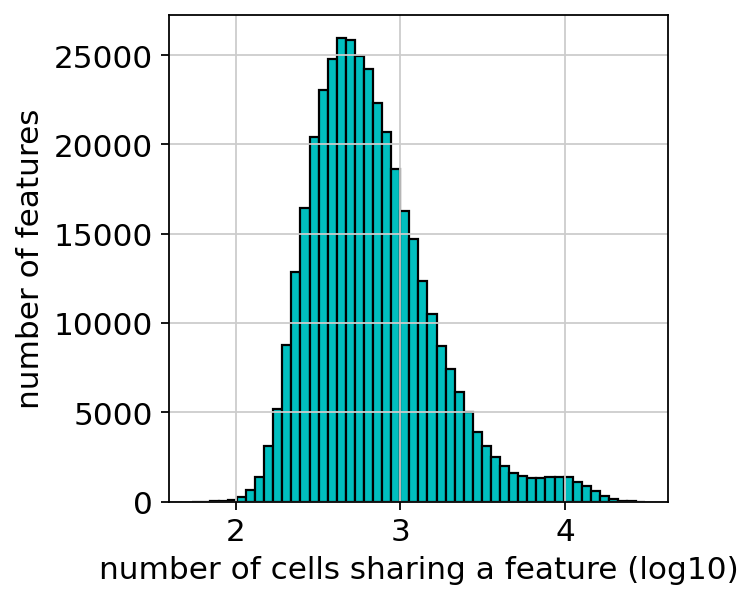

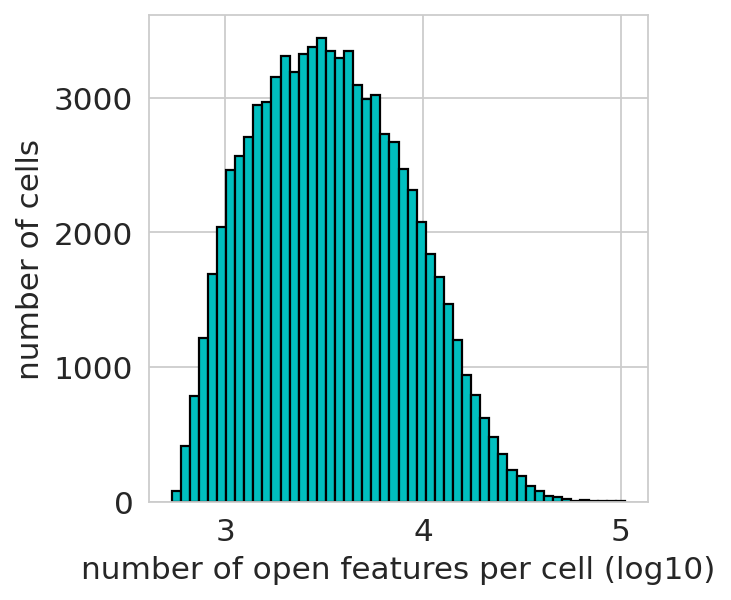

AnnData object with n_obs × n_vars = 81173 × 385215
    obs: 'original_file_name', 'cell_name', 'sample', 'barcode', 'tissue', 'mouse_ID', 'cell_label', 'nb_features'
    var: 'n_cells', 'commonness'

In [5]:
# Quality controls and Preliminary data processing

#binarize
epi.pp.binarize(adata)

### remove empty cells and empty features
epi.pp.filter_cells(adata, min_features=1)
epi.pp.filter_features(adata, min_cells=min_cells)

epi.pp.commonness_features(adata, binary=True, log=True)
epi.pp.coverage_cells(adata, binary=True, log=True)

adata

# Filtering

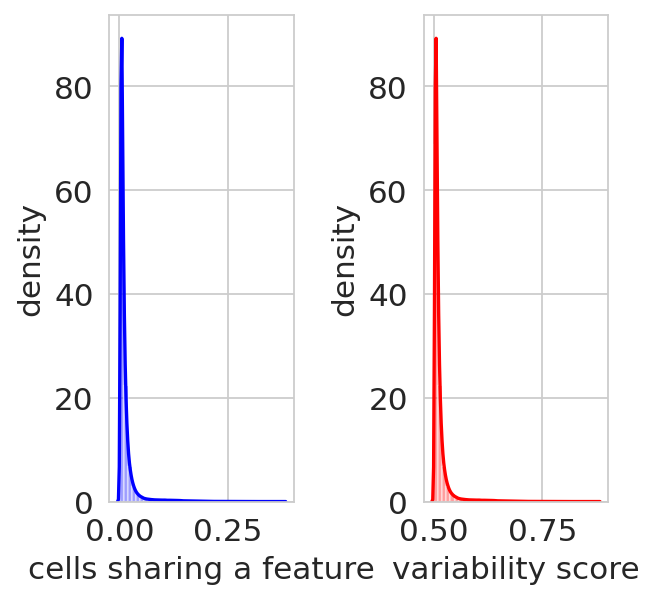

View of AnnData object with n_obs × n_vars = 81173 × 150117
    obs: 'original_file_name', 'cell_name', 'sample', 'barcode', 'tissue', 'mouse_ID', 'cell_label', 'nb_features'
    var: 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'


        Or use epi.pp.density_features.
    
Trying to set attribute `.var` of view, copying.


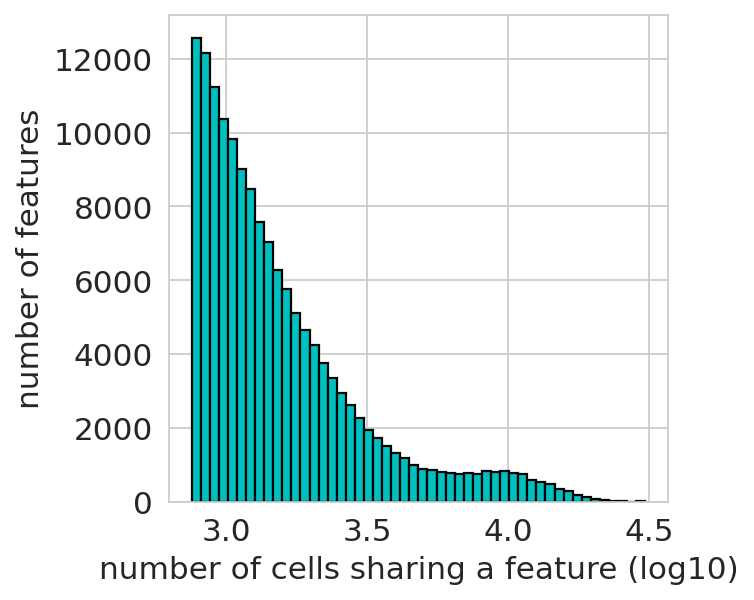

In [6]:
adata = epi.pp.select_var_feature(adata, nb_features=nb_of_features, copy=True)
print(adata)

epi.pp.commonness_features(adata, binary=True, log=True)

epi.pp.normalize_total(adata)
sc.pp.log1p(adata)


In [7]:
sc.pp.pca(adata, n_comps=50)

In [8]:
sc.pp.neighbors(adata, n_neighbors=n_neighbors, n_pcs=nb_pcs)
epi.tl.umap(adata)
#epi.tl.louvain(adata)

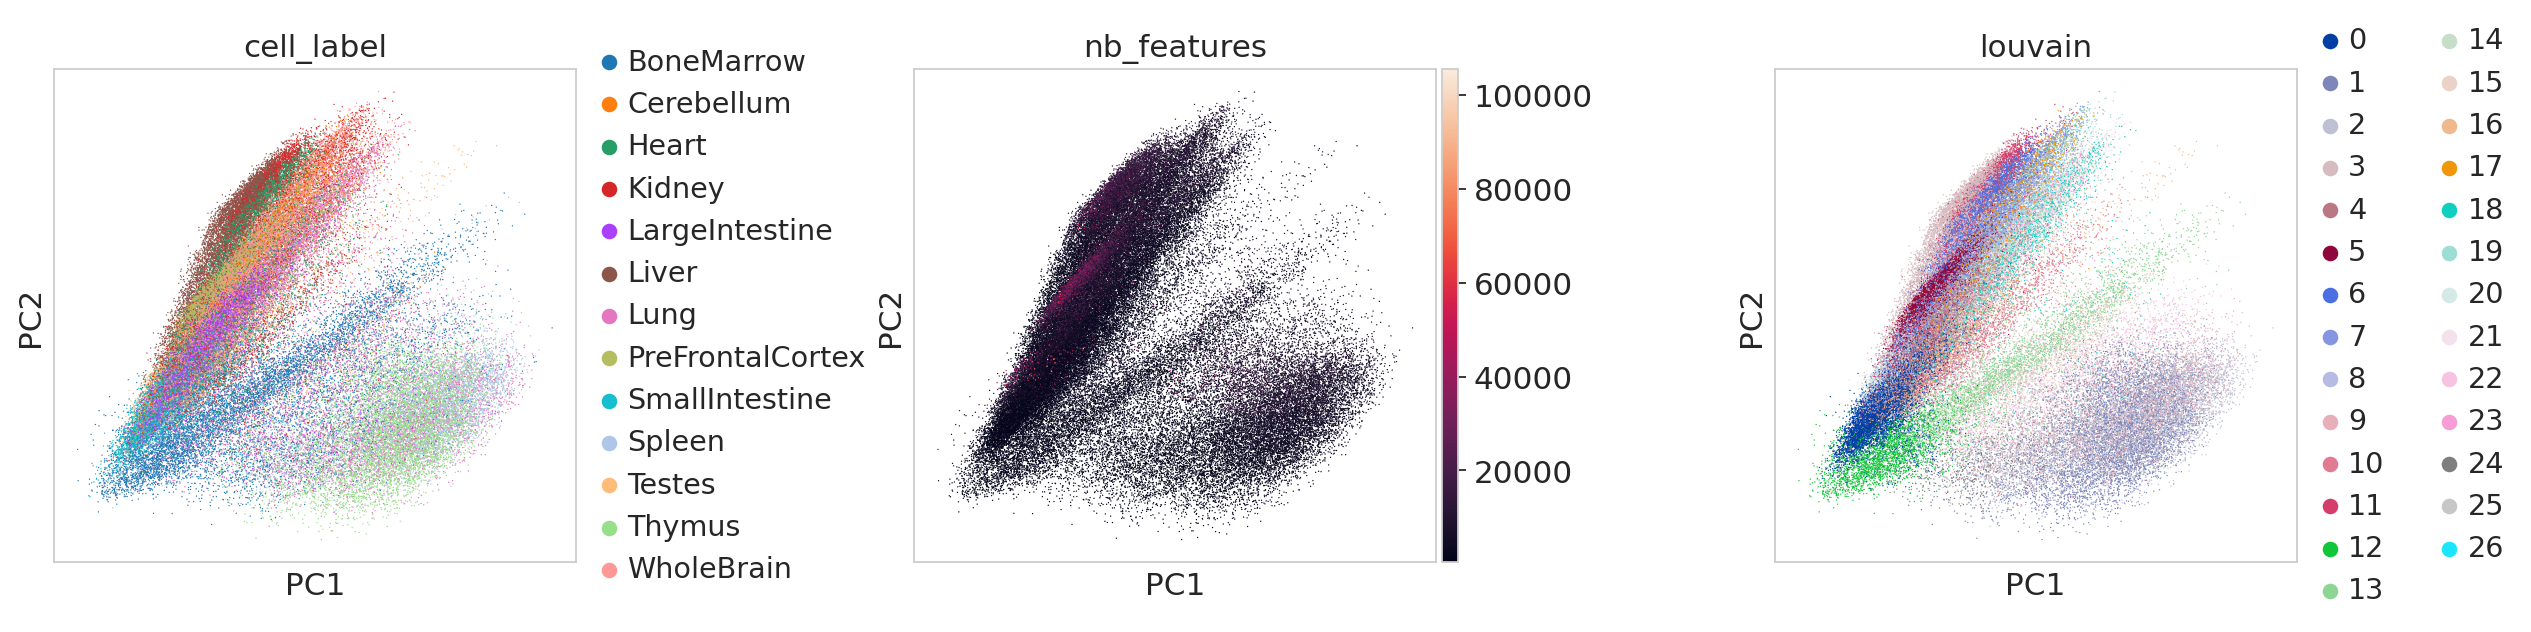

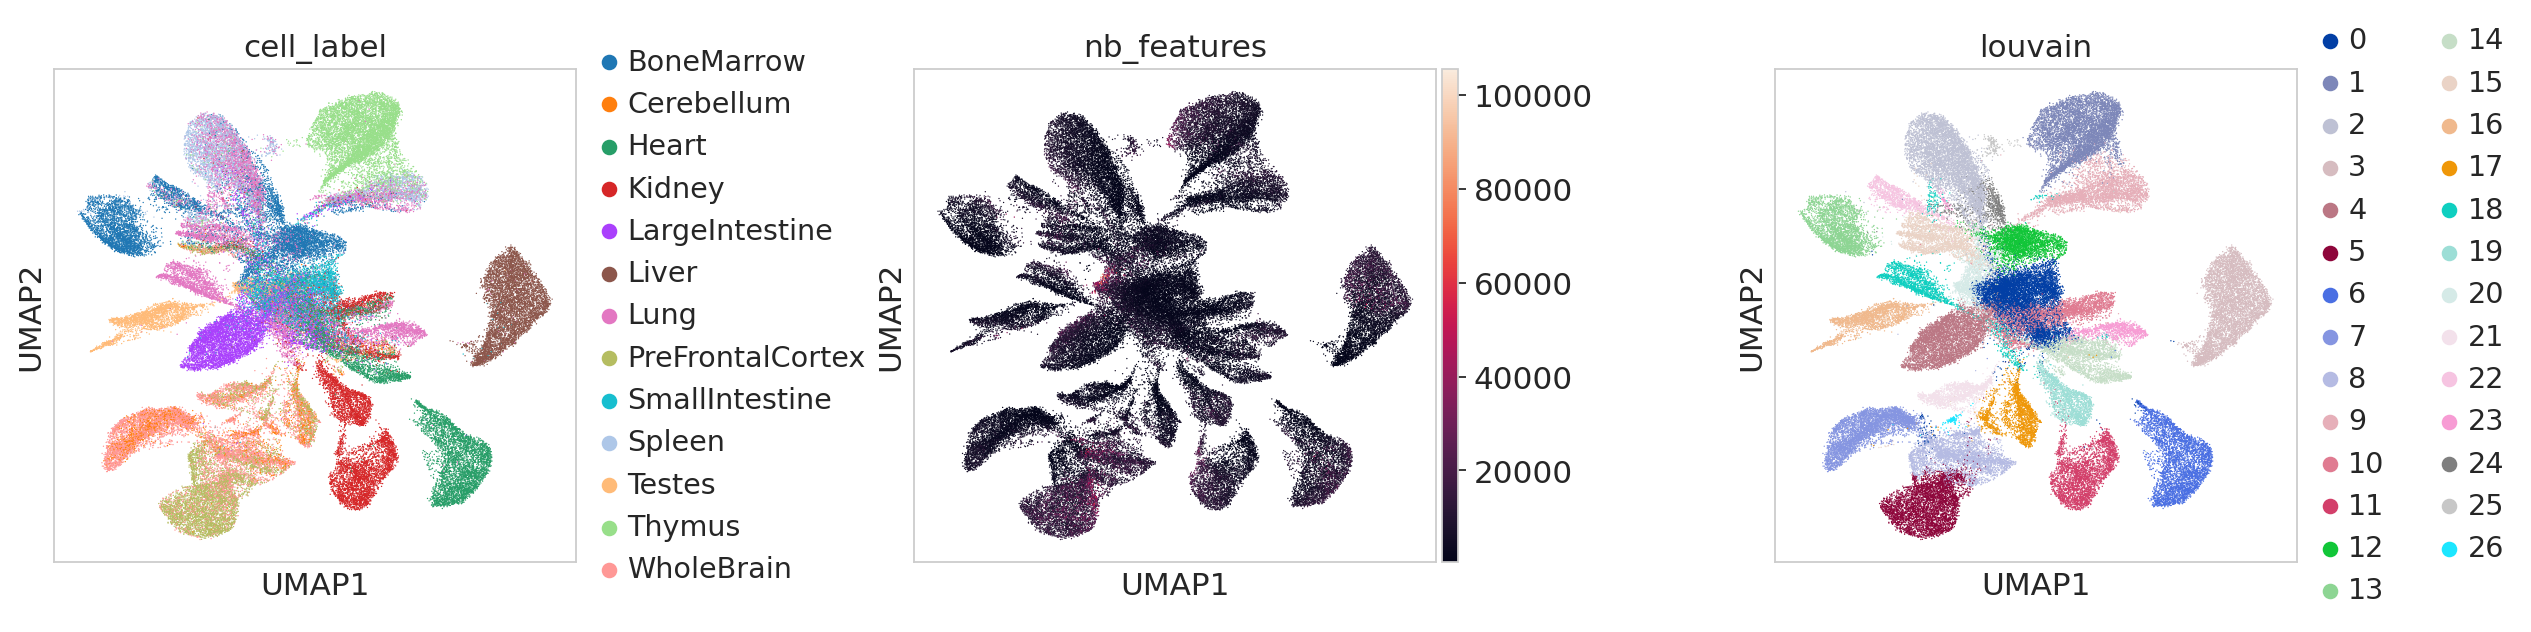

In [9]:
#sc.pl.pca(adata, color=['cell_label', 'nb_features', 'louvain'], wspace=0.5)
#sc.pl.umap(adata, color=['cell_label', 'nb_features', 'louvain'], wspace=0.5)
sc.pl.umap(adata, color=['cell_label', 'nb_features'], wspace=0.5)

In [11]:
adata.write('processed_cusanovich_whole_atlas.h5ad')

In [12]:
end = time.time()
print((end-start)/60.0)

10.705694011847179
